In [4]:
# import packages
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [26]:
# laod data
data= pd.read_csv("../data/data.csv")
print(data)
data.drop(columns = ['id'], inplace = True)
# data['diagnosis'].loc[data['diagnosis'] == 'B'] = 0
# data['diagnosis'].loc[data['diagnosis'] == 'M'] = 1
data['diagnosis'].replace('M', 1, inplace = True)
data['diagnosis'].replace('B', 0, inplace = True)

X = np.array(data.loc[:, data.columns != 'diagnosis'])
y = np.array(data['diagnosis'])

# train test split using sklearn
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 41)
print(len(x_train))
print(len(x_test))
print(len(y_train), y_train)
print(len(y_test), y_test)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [8]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)


# calculate the Manhattan distance between two vectors
def manhattan_distance(row1, row2):
    return sum(abs(row1 - row2))

# neighbors returns a list that contains the label of test_row's k nearest neighbors 
def get_neighbors(x_train, y_train, x_test_row, num_neighbors, dist_fn):
    distance = []
    for train in x_train:
        dist = dist_fn(x_test_row, train)
        distance.append(dist)
    sorted_dist_index = np.argsort(distance)[:num_neighbors]
    neighbors = []
    for i in sorted_dist_index:
        neighbors.append(y_train[i])
    return neighbors

# Make a classification prediction with neighbors
def predict(x_train, y_train, x_test_row, num_neighbors, dist_f):
    neighbors = get_neighbors(x_train, y_train, x_test_row, num_neighbors, dist_f)
    prediction = max(set(neighbors), key = neighbors.count)
    return prediction

def knn(x_train, y_train, x_test, num_neighbors, dist_fn):
    predictions = []
    for row in x_test:
        res = predict(x_train, y_train, row, num_neighbors, dist_fn)
        predictions.append(res)
    return predictions

def knn_accuracy(predictions, y_test):
    accuracy = sum(np.array(predictions) == y_test) / len(predictions)
    return accuracy


In [9]:
# for a4a data

# load data
num_neighbors = 5

# using Euclidean distance
euclidean_distance_prediction = knn(x_train, y_train, x_test, num_neighbors, euclidean_distance)
euclidean_distance_accuracy = knn_accuracy(euclidean_distance_prediction, y_test)
print(euclidean_distance_accuracy)
 
# using Manhattan distance
manhattan_distance_prediction = knn(x_train, y_train, x_test, num_neighbors, manhattan_distance)
manhattan_distance_accuracy = knn_accuracy(manhattan_distance_prediction, y_test)
print(manhattan_distance_accuracy)

0.9385964912280702
0.9473684210526315


In [19]:
# KNN accuracy WRT. K
K = []
acc = {"Euclidean": [], "Manhattan": []}
for i in range(1, 30):
    euclidean_distance_prediction = knn(x_train, y_train, x_test, i, euclidean_distance)
    euclidean_distance_accuracy = knn_accuracy(euclidean_distance_prediction, y_test)
    manhattan_distance_prediction = knn(x_train, y_train, x_test, i, manhattan_distance)
    manhattan_distance_accuracy = knn_accuracy(manhattan_distance_prediction, y_test)
    K.append(i)
    acc["Euclidean"].append(euclidean_distance_accuracy)
    acc["Manhattan"].append(manhattan_distance_accuracy)


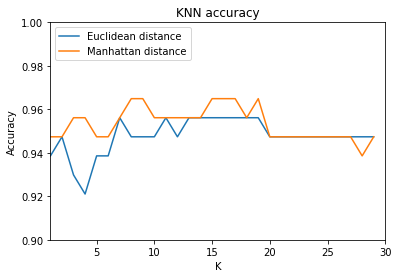

In [21]:
def plot_learningCurve(K, acc):
    # Plot training & validation accuracy values
    plt.plot(K, acc['Euclidean'])
    plt.plot(K, acc['Manhattan'])
    plt.title('KNN accuracy')
    plt.xlabel('K')
    plt.ylim([0.9, 1])
    plt.ylabel('Accuracy')
    plt.xlim([1, 30])
    plt.legend(['Euclidean distance', 'Manhattan distance'], loc = 'upper left')
    plt.show()

plot_learningCurve(K, acc)

In [31]:
k = 8
size = []
acc = {"Euclidean": [], "Manhattan": []}
for i in range(1, x_train.shape[0]):
    euclidean_distance_prediction = knn(x_train[: i], y_train[: i], x_test, k, euclidean_distance)
    euclidean_distance_accuracy = knn_accuracy(euclidean_distance_prediction, y_test)
    manhattan_distance_prediction = knn(x_train[: i], y_train[: i], x_test, k, manhattan_distance)
    manhattan_distance_accuracy = knn_accuracy(manhattan_distance_prediction, y_test)
    size.append(i)
    acc["Euclidean"].append(euclidean_distance_accuracy)
    acc["Manhattan"].append(manhattan_distance_accuracy)

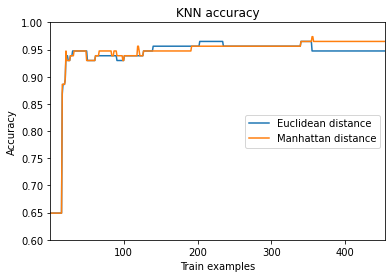

In [38]:
def plot_learningCurve(size, acc):
    # Plot training & validation accuracy values
    plt.plot(size, acc['Euclidean'])
    plt.plot(size, acc['Manhattan'])
    plt.title('KNN accuracy')
    plt.xlabel('Train examples')
    plt.ylim([0.6, 1])
    plt.ylabel('Accuracy')
    plt.xlim([1, 454])
    plt.legend(['Euclidean distance', 'Manhattan distance'], loc = 'right')
    plt.show()

plot_learningCurve(size, acc)